In [1]:
# woo getting data ready for some model
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
spotify_tracks = pd.read_csv('archive/tracks.csv')
print(spotify_tracks.shape)
spotify_tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Drop duplicates with same name and artist

In [3]:
spotify_tracks = spotify_tracks.drop_duplicates(
  subset = ['name', 'artists'],
  keep = 'last').reset_index(drop = True)
print(spotify_tracks.shape)

(526610, 20)


boring stuff from others

In [4]:
# Checking for Null Values IN the Dataset¶
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526610 entries, 0 to 526609
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526610 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526610 non-null  int64  
 3   duration_ms       526610 non-null  int64  
 4   explicit          526610 non-null  int64  
 5   artists           526610 non-null  object 
 6   id_artists        526610 non-null  object 
 7   release_date      526610 non-null  object 
 8   danceability      526610 non-null  float64
 9   energy            526610 non-null  float64
 10  key               526610 non-null  int64  
 11  loudness          526610 non-null  float64
 12  mode              526610 non-null  int64  
 13  speechiness       526610 non-null  float64
 14  acousticness      526610 non-null  float64
 15  instrumentalness  526610 non-null  float64
 16  liveness          52

Check nan values

In [5]:
spotify_tracks.isna().sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [6]:
quantitative_columns=[column for column in spotify_tracks.columns if spotify_tracks[column].dtypes!='object']
weoooo=spotify_tracks[quantitative_columns]



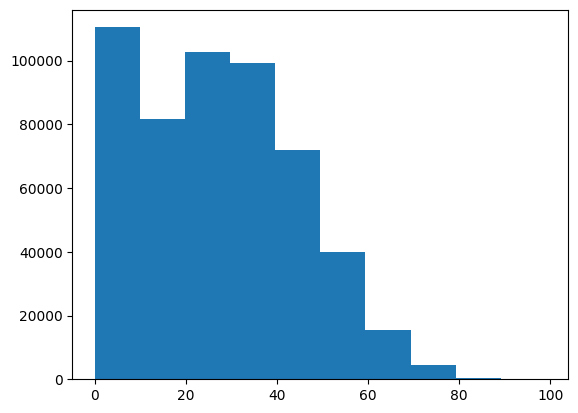

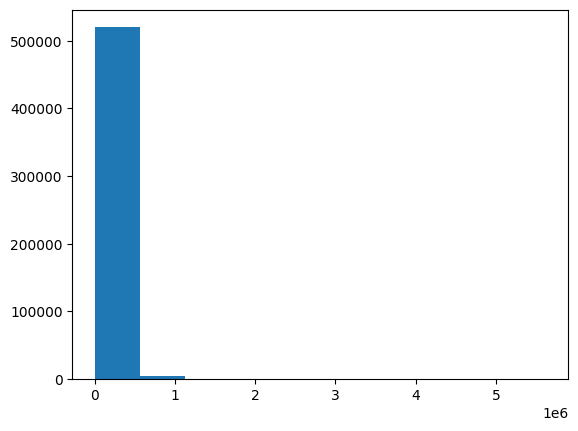

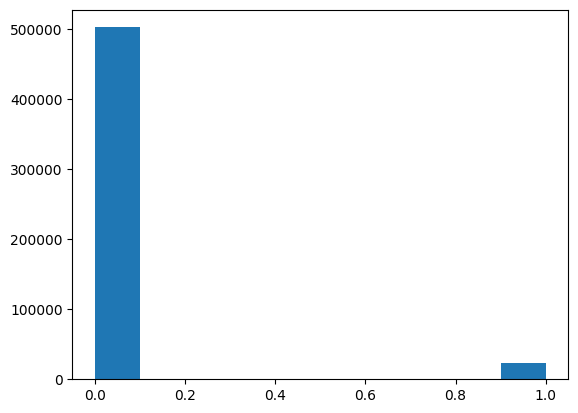

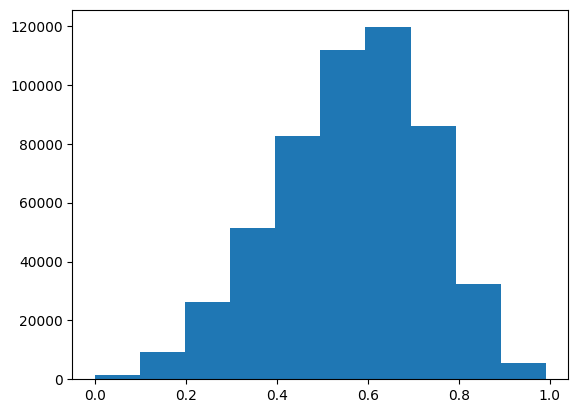

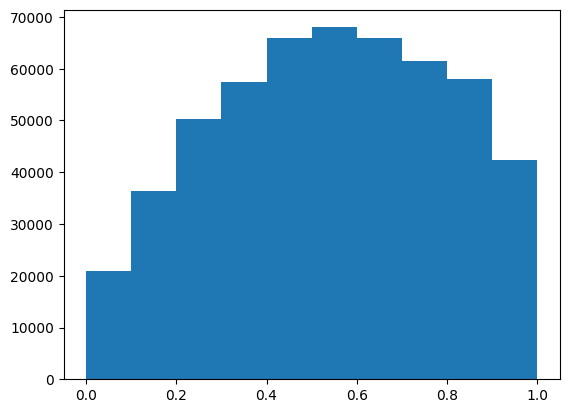

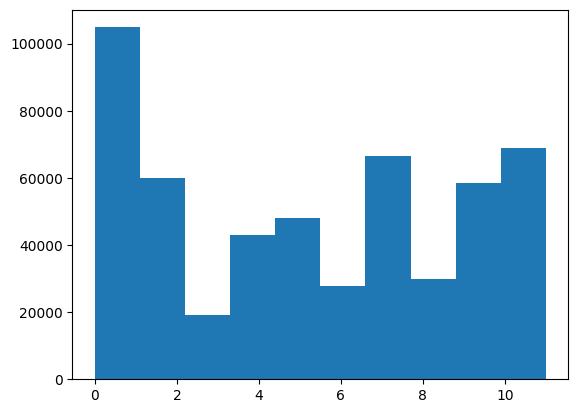

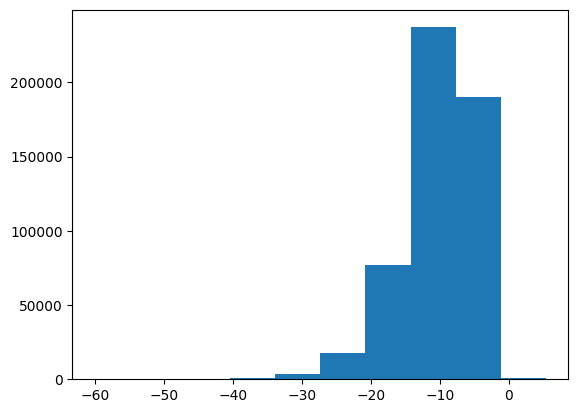

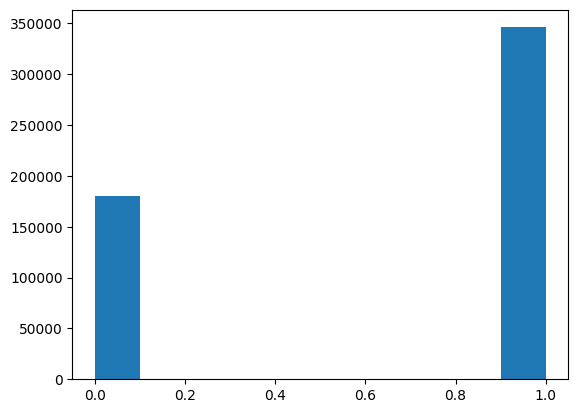

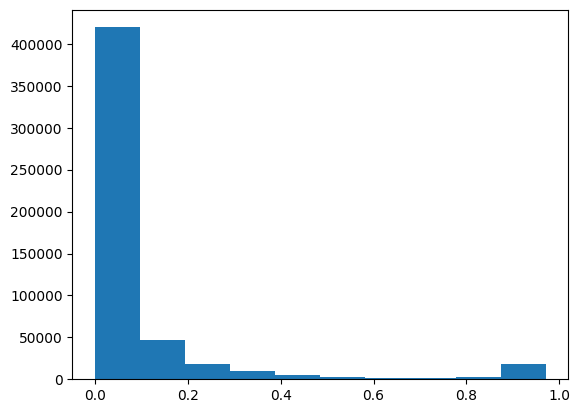

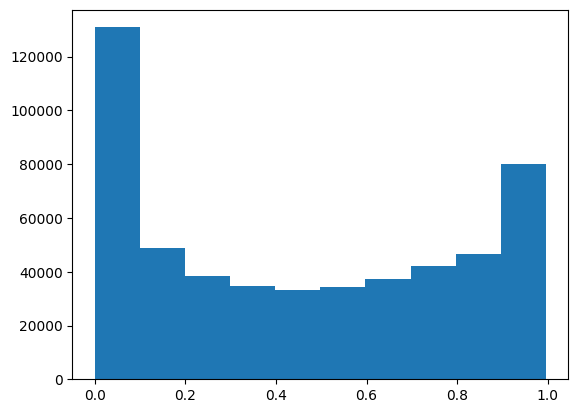

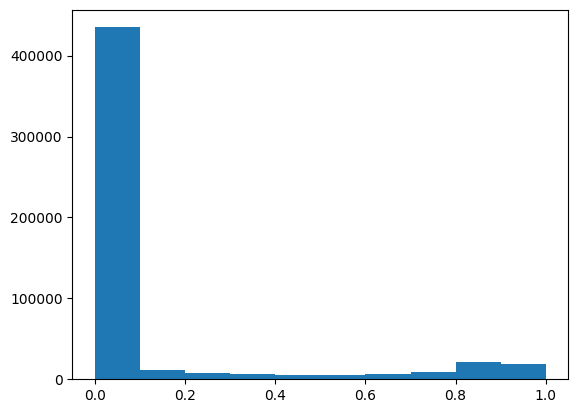

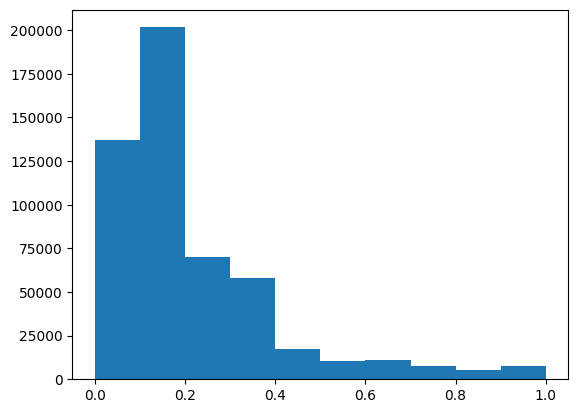

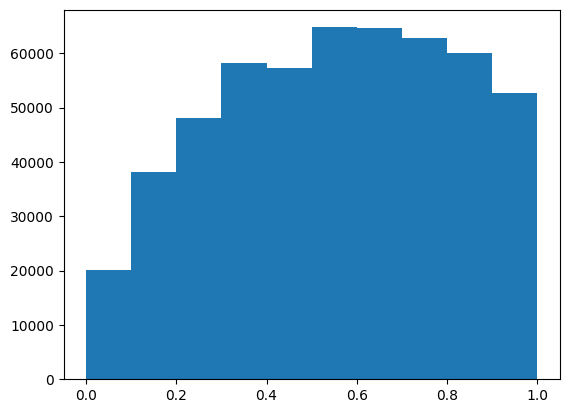

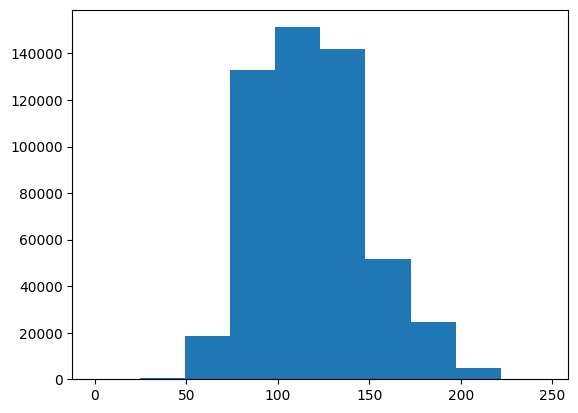

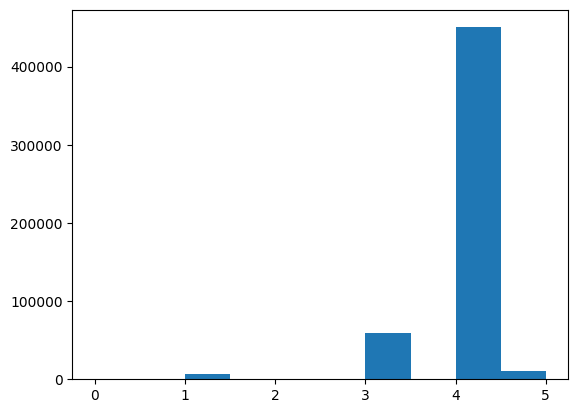

In [7]:

for column in quantitative_columns:
    plt.hist(weoooo[column])
    plt.show()

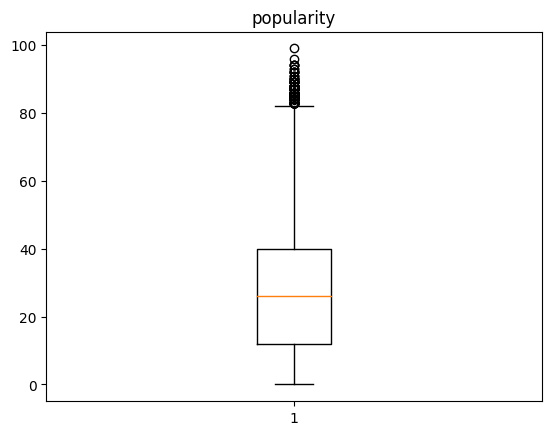

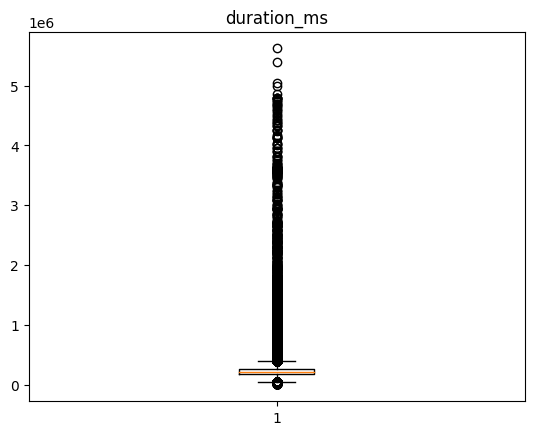

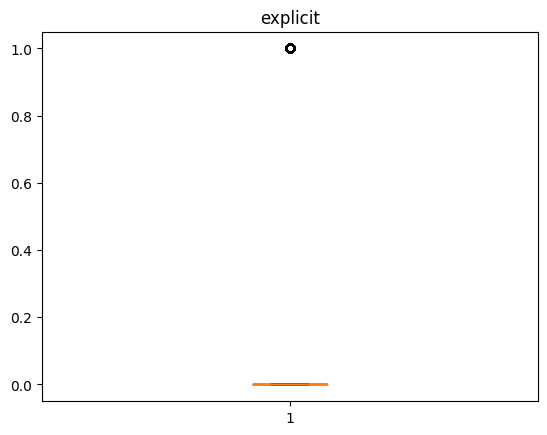

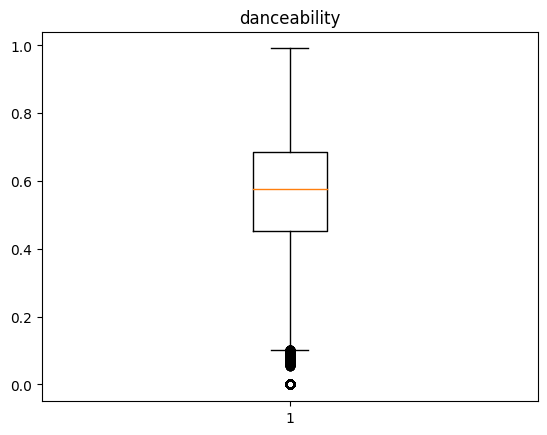

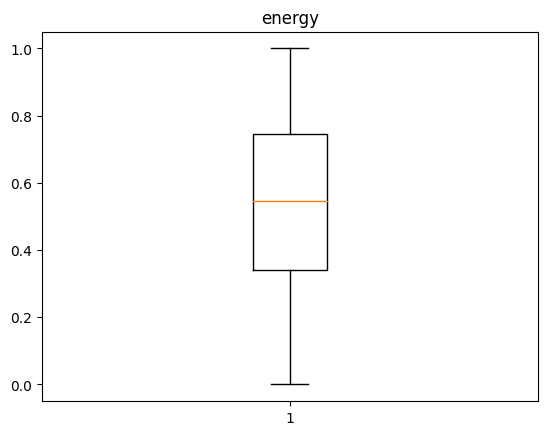

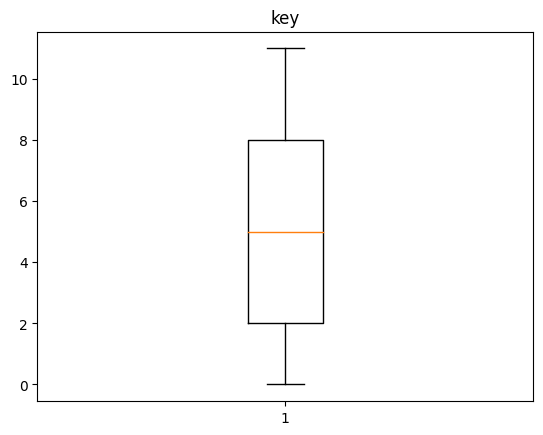

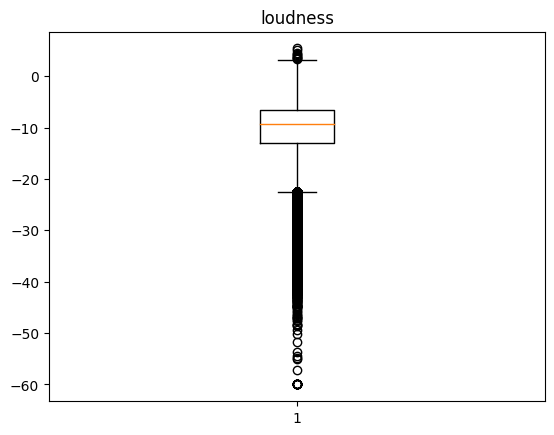

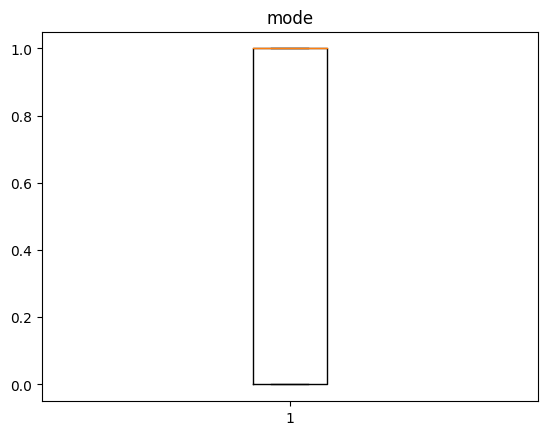

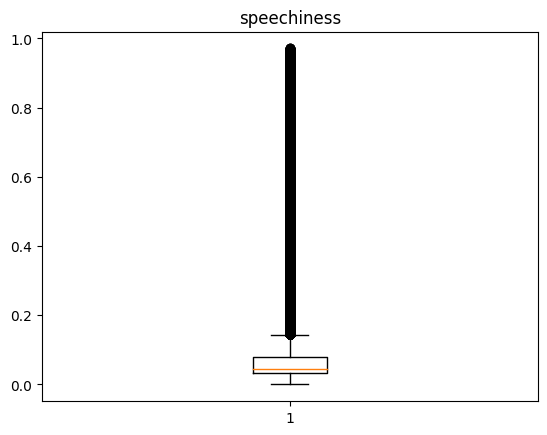

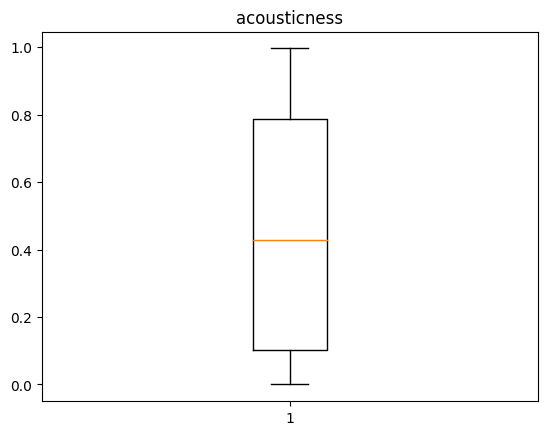

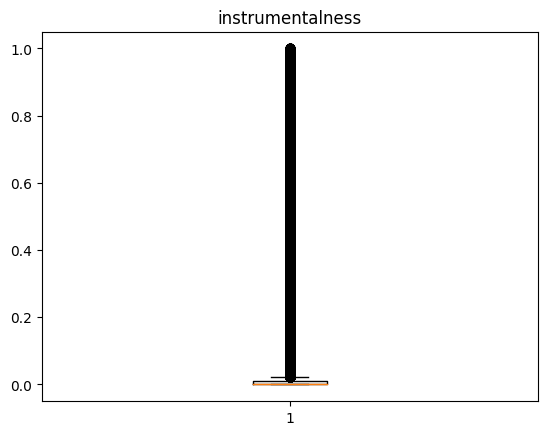

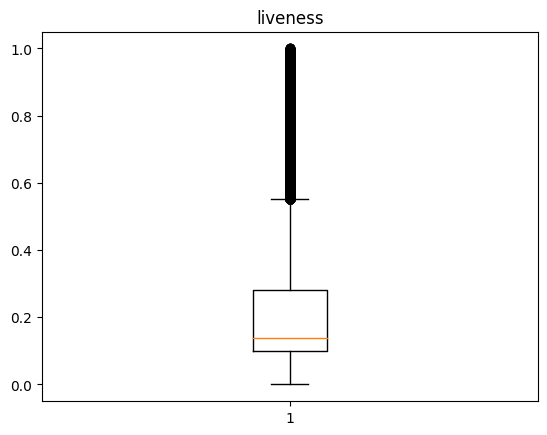

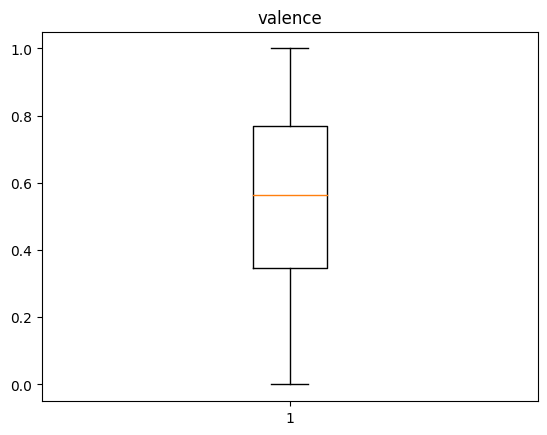

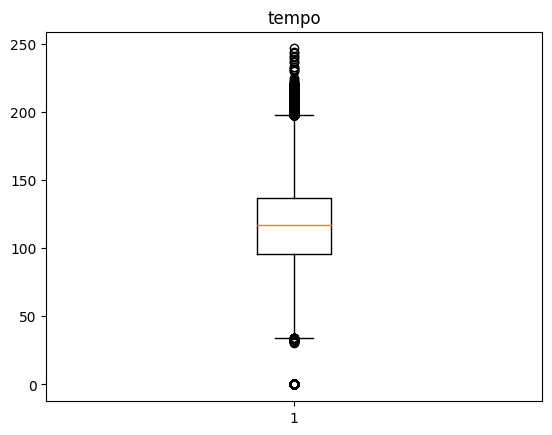

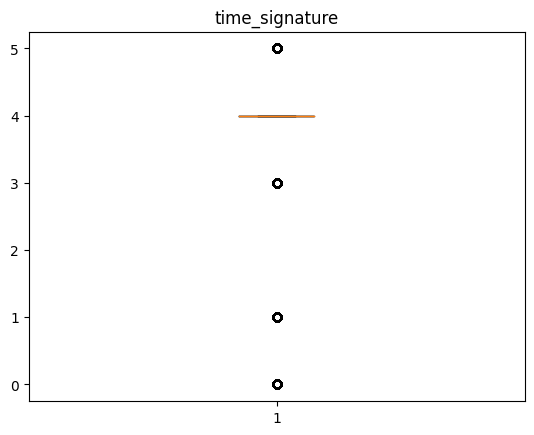

In [8]:
for column in quantitative_columns:
    plt.title(column)
    plt.boxplot(weoooo[column])
    plt.show()

In [9]:
# find about these variables https://developer.spotify.com/documentation/web-api/reference/get-audio-features
spotify_tracks.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [10]:
spotify_tracks['release_date']

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
526605    2020-09-26
526606    2020-10-21
526607    2020-09-02
526608    2021-03-05
526609    2015-07-01
Name: release_date, Length: 526610, dtype: object

In [4]:
spotify_tracks['release_date']= pd.to_datetime(spotify_tracks['release_date'])
spotify_tracks['release_date']

0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
526605   2020-09-26
526606   2020-10-21
526607   2020-09-02
526608   2021-03-05
526609   2015-07-01
Name: release_date, Length: 526610, dtype: datetime64[ns]

In [5]:
# remove songs older than 90'
year = 1990
exclude = spotify_tracks[spotify_tracks['release_date'].dt.year >= year]
exclude

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
32523,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3
32529,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4
32534,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4
32541,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3
32544,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526605,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
526606,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
526607,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
526608,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [13]:
# rearrange columns
cols = list(spotify_tracks.columns.values)
cols

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [6]:
df = exclude

In [7]:
df = df[['id',
        'name',
        'artists',
 'id_artists',
 'release_date',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'popularity',
]]
df.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
32523,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
32529,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
32534,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,40
32541,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
32544,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25


In [8]:
# try and remove titles that are not in english
print(df.shape)
from langdetect import detect
test = df.copy()
# remove non latin characters so that language detection works (replace its with empty)
test['name'] = test['name'].str.encode('ascii', 'ignore').str.decode('ascii')
# remove empty rows
test = test[test["name"] != " "]
test = test[test["name"] != ""]
test = test[test['name'].notna()]

print(test.shape)

(290788, 20)
(265936, 20)


In [17]:
test

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
32523,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
32529,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
32534,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4,40
32541,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
32544,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526604,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,106002,0,0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,4
526606,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
526607,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70
526608,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,142003,0,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,58


In [9]:
# reset index
test = test.reset_index(drop=True)

## Analyse audio features


### duration_ms

In [19]:
test['duration_ms']

0         160187
1         159560
2         141987
3         187333
4         236800
           ...  
265931    106002
265932    153293
265933    187601
265934    142003
265935    214360
Name: duration_ms, Length: 265936, dtype: int64

<Axes: >

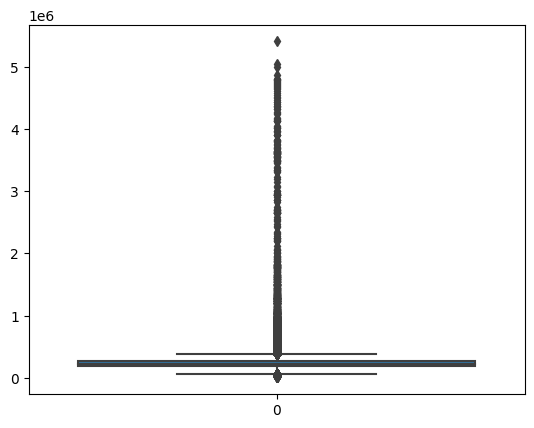

In [20]:
# identify outliers (makes it easier to detect language maybe)
import seaborn as sns
sns.boxplot(test['duration_ms'])

In [21]:

# IQR
Q1 = np.percentile(test['duration_ms'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(test['duration_ms'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/3942683950.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(test['duration_ms'], 25,
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/3942683950.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(test['duration_ms'], 75,


80333.5

In [22]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [23]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(test['duration_ms']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(test['duration_ms']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

Upper Bound: 388233.25
(array([    27,     31,     37, ..., 265757, 265784, 265800]),)
“Lower Bound:” 66899.25
(array([    19,     22,    166, ..., 265905, 265907, 265910]),)


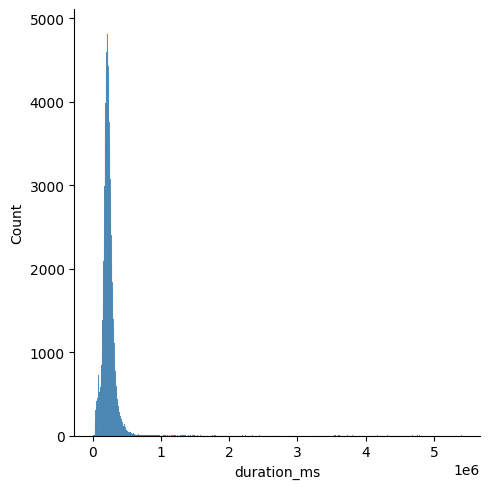

In [24]:
sns.displot(test, x="duration_ms")

In [25]:
print(test.shape)
test.drop(upper_array[0],inplace=True)
test.drop(lower_array[0],inplace=True)
 
print("New Shape: ", test.shape)

(265936, 20)
New Shape:  (251601, 20)


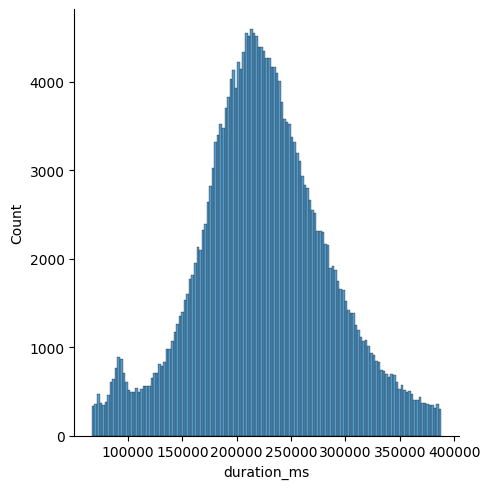

In [26]:
sns.displot(test, x="duration_ms")

In [27]:
# triple check your duration is ok (transform in minutes)
print(test['duration_ms'].max()/60000, test['duration_ms'].min()/60000)

6.470533333333333 1.1151166666666668


In [28]:
# how many above 3.7
print(len(np.where(test['duration_ms']/60000>5)[0])/len(test['duration_ms']))
# how many below 2.5
print(len(np.where(test['duration_ms']/60000<2.5)[0])/len(test['duration_ms']))

0.10802421294033013
0.09690740497851758


I'd say cut anything over 5 (EDM) / under 2.5 (for radio, but tiktok might mess this up. depends on goal really. would probably end up cutting since you still want radio playing songs. let's see what is also in billboard first? be conservative with this cut)

In [29]:
# remove songs under and over a certain treshhold
print(test.shape)
test = test[ (test['duration_ms'] <= (5*60000)) & (test['duration_ms'] >= (2.5*60000))]
print(test.shape)

(251601, 20)
(200040, 20)


In [30]:
# check for nans
np.where(test['duration_ms'].isna())

(array([], dtype=int64),)

## release_date 

In [31]:
test.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
4,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25
6,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,158800,0,0.459,0.344,1,-12.205,1,0.0301,0.764,0.000594,0.111,0.487,106.479,4,23


In [32]:
df =  test.copy()
df['release_date']

0        2008-02-11
1        2020-03-13
3        2018-05-04
4        2018-05-04
6        2008-02-11
            ...    
265929   2020-03-03
265930   2020-03-20
265932   2020-10-21
265933   2020-09-02
265935   2015-07-01
Name: release_date, Length: 200040, dtype: datetime64[ns]

<Axes: xlabel='release_date'>

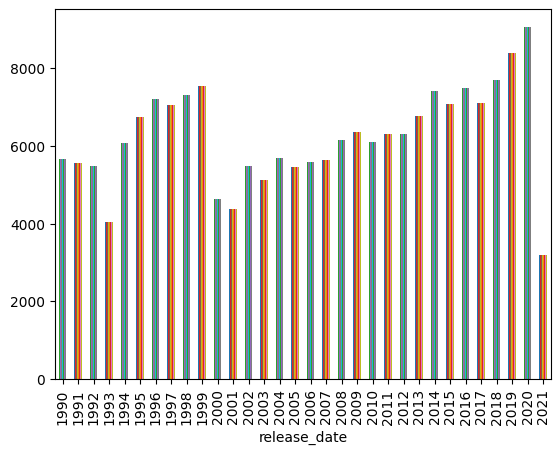

In [33]:
# Analyze by year
df.groupby(df["release_date"].dt.year).count().plot(kind="bar", legend=None)

In [34]:
# double check percentages are ok
print('90s', len(np.where(df['release_date'].dt.year <=1999)[0])/len(df['release_date']))
print('2000s', len(np.where((df['release_date'].dt.year <=2010) & (df['release_date'].dt.year >=2000))[0])/len(df['release_date']))
print('2010s', len(np.where(df['release_date'].dt.year >2010)[0])/len(df['release_date']))

# extra
print('the best years', len(np.where((df['release_date'].dt.year <=2016) & (df['release_date'].dt.year >=2011))[0])/len(df['release_date']))
print('the dead years', len(np.where(df['release_date'].dt.year >=2017)[0])/len(df['release_date']))

90s 0.31315236952609476
2000s 0.30291941611677664
2010s 0.3839282143571286
the best years 0.20680863827234552
the dead years 0.17711957608478304


Seems distrbuted jusst fine. I think there is a big difference between the early 2010s and late 2010 (can probably find articles that verify this, think coachella vs tiktok) if we want to check it out in our analysis (as an extra, or if the 2010s dont give any clear results of popularity)

Might want to even avoid 2021 if we don't then*

## popularity

do first thos

In [35]:
df.head()

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,41
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,26
4,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3,25
6,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,158800,0,0.459,0.344,1,-12.205,1,0.0301,0.764,0.000594,0.111,0.487,106.479,4,23


In [36]:
df['popularity']

0         56
1         41
3         26
4         25
6         23
          ..
265929    43
265930    66
265932    72
265933    70
265935    38
Name: popularity, Length: 200040, dtype: int64

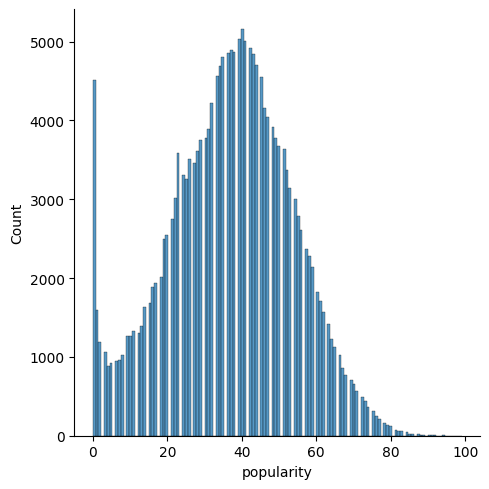

In [37]:
sns.displot(df, x="popularity")

In [38]:
# check for any nulls (spotify is from 0 to 100)
df[df['popularity'].isna()]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


In [39]:
df[df['popularity']=='']

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


In [40]:
df[df['popularity']==' ']

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


## explicit

Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).


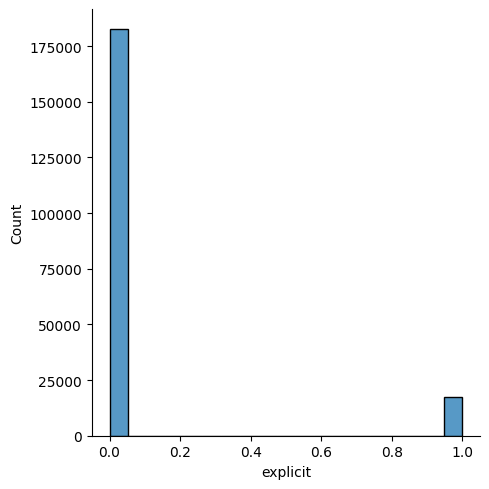

In [41]:
sns.displot(df, x="explicit")

In [42]:
# find all columns with NaN values (see past project to viz this when the time to make it prety comes)
df.isnull().any()


id                  False
name                False
artists             False
id_artists          False
release_date        False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
popularity          False
dtype: bool

Will not deal much with this bc it's going to die anyway.

## key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Example value: 9
Range: -1 - 11

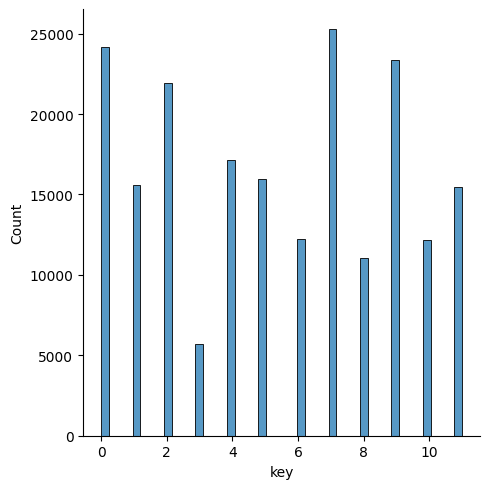

In [43]:
sns.displot(df, x="key")

In [44]:
df[df['key']==-1]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity


## mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

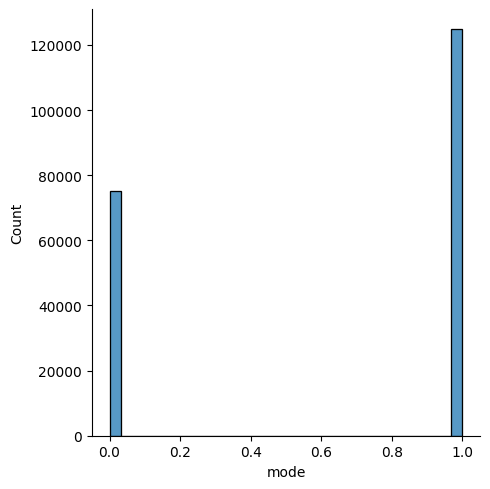

In [45]:
sns.displot(df, x="mode")

## time_signature

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
Example value: 4
Range: 3 - 7

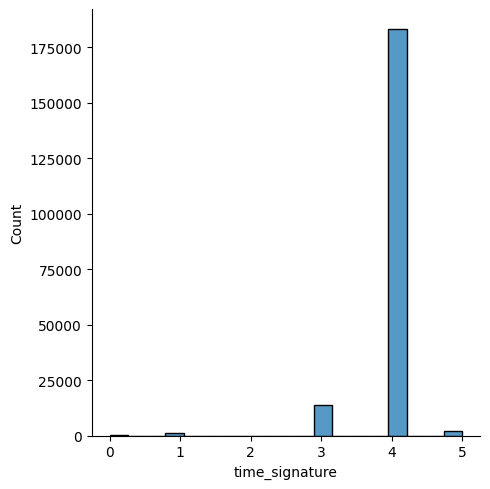

In [46]:
sns.displot(df, x="time_signature")

In [47]:
df[df['time_signature']==0]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
16317,7dTyZl4cBRKnPBeq1fdrHY,White Noise,['Rain Sounds'],['5nSGBmlgUdqWNExnOX8VtV'],2012-05-07,240000,0,0.000,0.601000,4,-13.753,0,0.0000,0.119000,0.77100,0.9680,0.000,0.000,0,64
18908,3hJJOnsafnWFrhWDwhvZSy,Box Fan Rest Sound,['Fan Sounds'],['3rolEAXFOTW33tkUA2VOuo'],2016-11-11,222760,0,0.000,0.000020,4,-25.213,1,0.0000,0.138000,0.14500,0.1120,0.000,0.000,0,69
20188,129ldjjvnFfA7Ygc8ktYnh,Soft Brown Noise,['High Altitude Samples'],['3T9Rn6sxhCylmpTyWCuu1f'],2018-11-15,160003,0,0.000,0.001480,5,-31.839,1,0.0000,0.394000,1.00000,0.1110,0.000,0.000,0,76
21764,3YYni1jodOmekz697cuwhl,Its Been A Year,"['No Spirit', 'Kyle McEvoy']","['4XbnhifKeOnyfTsCInrQsX', '6rRqxCKHpl9C5Imf2u...",2020-03-18,163077,0,0.000,0.268000,0,-12.754,1,0.0000,0.601000,0.82100,0.0525,0.000,0.000,0,25
32516,3AFEx7f9qxc6U59s27Tp1V,White Noise Crashing Waves,['Bruce Brus'],['6jKgLzBdINpIrcinbmi7hI'],2019-08-09,168000,0,0.000,0.000431,0,-14.105,0,0.0000,0.862000,0.97700,0.1620,0.000,0.000,0,72
52227,0YYauGVTE5YbcwD33f0MUB,Clean Pink Noise - Loopable with No Fade,['Pink Noise Babies'],['3IbU77P0FS0SrnmP45ssrx'],2017-09-04,195195,0,0.000,0.000020,1,-9.511,1,0.0000,0.001670,0.94500,0.5980,0.000,0.000,0,55
52518,18lKp9uRyR2xJZFvg8ZWUC,Clean & Pure White Noise,['Zenibly'],['3Lbo9NybtvftZ5hgfe8KVg'],2018-08-01,150000,0,0.000,0.092400,1,-26.764,1,0.0000,0.455000,0.40800,0.1110,0.000,0.000,0,70
52557,2GBvksBLD4dLqjKbqp4uor,Clover,['Granular'],['1jfnMuDBl5OaAoU0VwLD8m'],2018-07-06,235135,0,0.000,0.010900,5,-20.829,1,0.0000,0.982000,0.17600,0.1270,0.000,0.000,0,62
56341,6NBiOy0zOS8oXXX5e87PkT,Vacuum Cleaner,['Baby Sweet Dream'],['7M4enEYox7R9wzknseZnxC'],2010-01-01,300000,0,0.000,0.000199,0,-32.778,1,0.0000,0.982000,0.89700,0.9250,0.000,0.000,0,38
56374,3cJbNaXdqRuuEoksg0j7LC,Pure White Noise,['Baby Sweet Dream'],['7M4enEYox7R9wzknseZnxC'],2010-01-01,300000,0,0.000,0.000020,6,-33.764,0,0.0000,0.690000,0.42000,0.8630,0.000,0.000,0,46


In [48]:
# loool remove duplicates by id? if any

In [49]:
# remove anythign  with white noise in it <3


In [50]:
df[df['time_signature']==1]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
26,6l82JF2bHWDnbdSp7mw5dP,"It Was A Very Good Year - Live At The Sands, L...","['Frank Sinatra', 'Count Basie']","['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...",2006-11-07,231267,0,0.329,0.224,10,-17.672,1,0.0737,0.87700,0.000004,0.9590,0.2360,80.532,1,14
28,6bgnQlDQKgni9fH7mEQ1sC,"The September Of My Years - Live At The Sands,...","['Frank Sinatra', 'Count Basie']","['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...",2006-11-07,183960,0,0.292,0.220,7,-16.917,1,0.0431,0.88600,0.000001,0.9090,0.2210,108.978,1,13
223,4isHNeD2knqlQ850CykFMq,"Big ""B""",['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,221133,0,0.372,0.697,8,-9.838,1,0.0395,0.28700,0.878000,0.0836,0.5560,163.248,1,1
288,061wPjsBtaMBfWbUA1Ev36,For Loving You,['Bill Anderson'],['0gWNSMYCSHF4wxIs1XTSDh'],2011-06-13,166680,0,0.426,0.185,3,-20.106,1,0.0476,0.86900,0.000016,0.3420,0.4410,122.964,1,0
522,4xVZmLJtBTedcXbDB3qYdX,(En) El Sptimo Da - Remasterizado 2007,['Soda Stereo'],['7An4yvF7hDYDolN4m5zKBp'],1990-10-09,263280,0,0.582,0.864,4,-6.356,1,0.0260,0.00180,0.000578,0.1700,0.8900,106.191,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264105,3Dyk8yOy6vs4hOvJ8UPJAe,Fire of Us - Alexxi Radio Edit,['Alaa'],['0F2YGp10ROcJQa9Z9jwp9v'],2014-08-04,242896,0,0.661,0.602,9,-8.767,0,0.0592,0.00312,0.003030,0.1020,0.3030,128.033,1,40
264900,3B3y6Y9ZwvsSIliE4mH5TT,This Is the One,['Anna Ternheim'],['6xSTQT32ZxLQPe37QIC308'],2019-09-20,221082,0,0.583,0.366,11,-10.098,0,0.0393,0.84900,0.000103,0.0979,0.3020,76.033,1,55
265416,6t9p80a2DUZhjBCh5MotjB,Borde g hem,['Bolaget'],['55ZGFvikpNjQHvtTWS5aZF'],2021-03-17,156000,0,0.724,0.448,5,-9.918,0,0.0562,0.38700,0.000000,0.3970,0.7170,129.950,1,59
265571,58hyDWe9z3FzYfn7J28Yc7,Litany of the Saints,['The Cathedral Singers'],['6GCii6lkUhkzTrznRyCuVh'],1995-01-01,226773,0,0.182,0.147,2,-20.933,1,0.0328,0.97100,0.145000,0.1860,0.0389,96.233,1,25


Come back to this, but estimated so probs can remove (if we end up using time_signature, if not come back, reassess, bc its like 2 k).
https://github.com/spotify/web-api/issues/379 

In [51]:
df = df[(df['time_signature'] != 0) & (df['time_signature'] !=1)]


In [52]:
df.columns

Index(['id', 'name', 'artists', 'id_artists', 'release_date', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popularity'],
      dtype='object')

## Proper audio

### Danceability
 A value of 0.0 is least danceable and 1.0 is most danceable.

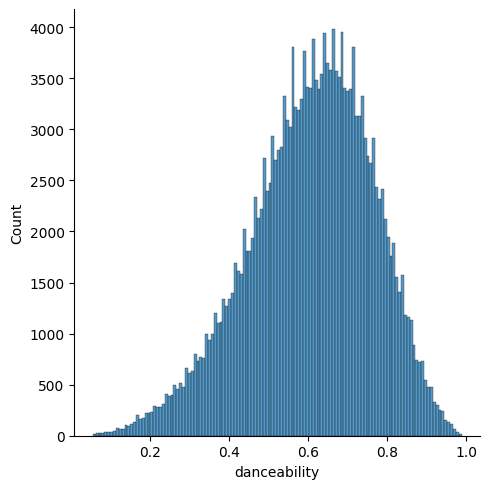

In [53]:
sns.displot(df, x="danceability")

In [54]:

# IQR
Q1 = np.percentile(df['danceability'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['danceability'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(df['danceability']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(df['danceability']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

Upper Bound: 1.0385
(array([], dtype=int64),)
“Lower Bound:” 0.18650000000000005
(array([    14,    210,    241, ..., 198827, 198888, 198990]),)


/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/3558776777.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['danceability'], 25,
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/3558776777.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['danceability'], 75,


In [55]:
len(lower_array[0])

1492

idk if to remove or not, maybe on second round look at what songs these are

In [56]:
df = df.reset_index(drop=True)
df

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.2650,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.8670,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
2,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.2010,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
3,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.1290,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
4,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,158800,0,0.459,0.3440,1,-12.205,1,0.0301,0.764,0.000594,0.1110,0.4870,106.479,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199014,1Kzjk1EyngBcP4T8x3fyqv,(...),['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,205238,0,0.743,0.6790,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.3950,126.070,4,43
199015,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,66
199016,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
199017,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70


### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

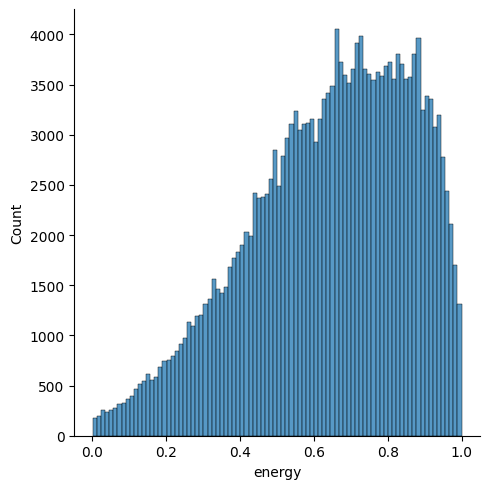

In [57]:
sns.displot(df, x="energy")

## loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

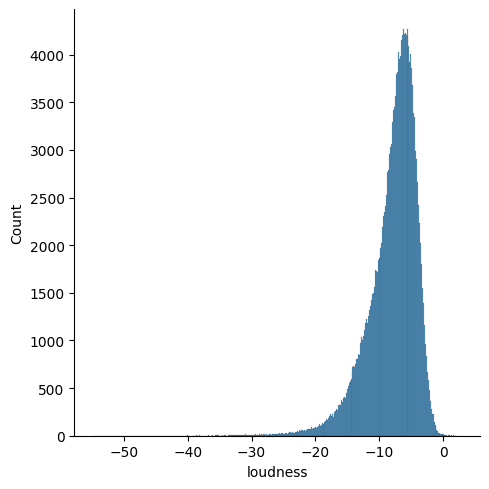

In [58]:
sns.displot(df, x="loudness")

In [59]:
df[df['loudness']>0]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
5536,4d3tNjH6aYSxdpWSIdoIcq,Year 3000,['Zen'],['7Jf2WduAnraowinployZsu'],2013-08-12,286424,0,0.765,0.933,2,0.781,1,0.0903,0.053000,0.077100,0.1500,0.1650,175.011,4,0
8706,49ErwcBYfYRPNBdRuPvpYA,We Are Your Friends - Justice Vs Simian,"['Justice', 'Simian']","['1gR0gsQYfi6joyO1dlp76N', '19rgRqYVP3LJf9tGmM...",2006-01-01,262773,0,0.615,0.970,9,1.342,0,0.1190,0.010400,0.384000,0.1780,0.5070,122.993,4,62
10770,5rZL9VxQ2SVpF2sG8OmmNQ,The En4orcer Riddim,['Blakk Boii Frazzle'],['3gDIEtaiNBM8jez8vlnQEX'],2020-07-25,192024,0,0.806,0.849,0,0.403,1,0.0449,0.137000,0.878000,0.1680,0.5050,120.132,4,0
10947,7t4mx7fDYsedIB9VOI4oR9,Fuck Year - Demo 2011,['Každej Rock Jinak'],['72ZUvINfhfKceaAvJtPPdX'],2013-11-23,192522,1,0.491,0.985,7,0.109,1,0.2180,0.042700,0.288000,0.0747,0.1260,129.075,4,0
15146,4oumhcbfNPdF36OrIfv4YS,Move Ma Body,"['Atmozfears', 'Demi Kanon']","['0MBGxwmCdXdO26ojaNcT64', '0MwTAzU4fDGGfrUAHz...",2019-12-27,160187,1,0.687,0.957,9,0.101,0,0.1530,0.034800,0.083000,0.4240,0.3560,150.055,4,6
16739,2jokiK1VyPvStUr4kKhgdZ,Suicide Bound - 1993 Unreleased Version,['Opposition Party'],['638OIdFOJet787Xb5mZfVt'],2004-01-01,294493,0,0.239,0.993,4,2.854,0,0.1000,0.001570,0.262000,0.1140,0.3250,150.862,4,0
16855,1gBm8yGdR8e4qv9GyEpSWH,Demon,['Solar Eclipse'],['1i1enVClUTfruGPkLXCrTw'],2014-01-17,288072,0,0.421,0.999,5,1.933,0,0.2480,0.002540,0.958000,0.5150,0.1130,157.986,4,0
22586,5sqkarfxe7UejHTlCtHCLS,Let Me Hear,"['Fear, and Loathing in Las Vegas']",['5iZSZ19Lnt6iQTDITRF7Mn'],2015-09-30,225547,0,0.175,0.995,6,1.023,0,0.2110,0.000145,0.000003,0.2140,0.3030,184.066,4,65
22649,5mqzhMuUpvnMfwNz6iepmO,Welcome to the Party (with French Montana & Li...,"['Diplo', 'French Montana', 'Lil Pump', 'Zhavi...","['5fMUXHkw8R8eOP2RNVYEZX', '6vXTefBL93Dj5IqAWq...",2018-05-15,181720,1,0.618,0.845,2,0.175,1,0.1320,0.114000,0.000000,0.4150,0.4860,171.921,4,71
24587,5PVv4YALJruehQKyAlwjfE,Must Be The Ganja,['Eminem'],['7dGJo4pcD2V6oG8kP0tJRR'],2009-05-15,242907,1,0.728,0.801,1,0.161,1,0.2970,0.322000,0.000000,0.2440,0.7940,82.657,4,56


There are some songs that are so random, like arsen petrosov ! has pop 43 just bc russia I guess? idk
how do you even deal with this? you have to remove non english songs by lyrics (but double do it just so it's less on genius api)

In this case idek if to remove the outliers bc i do not have the industry knowledge!

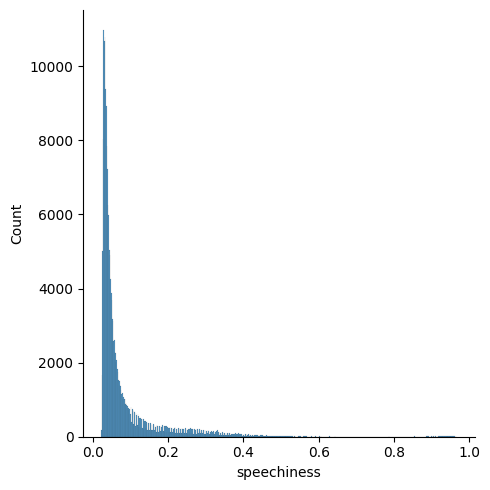

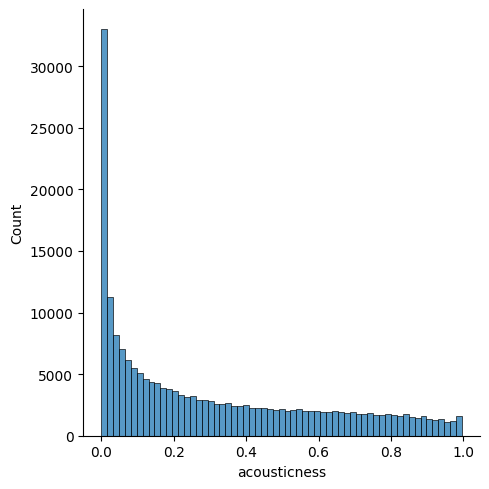

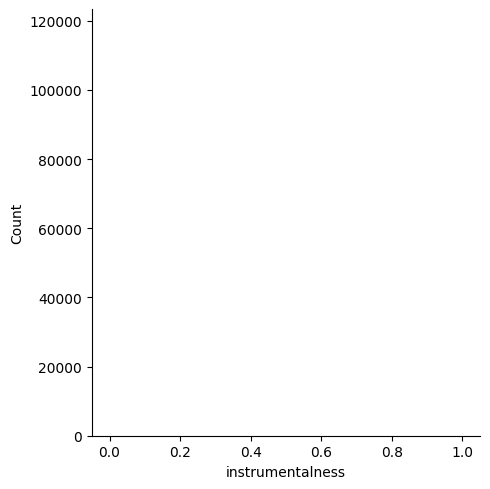

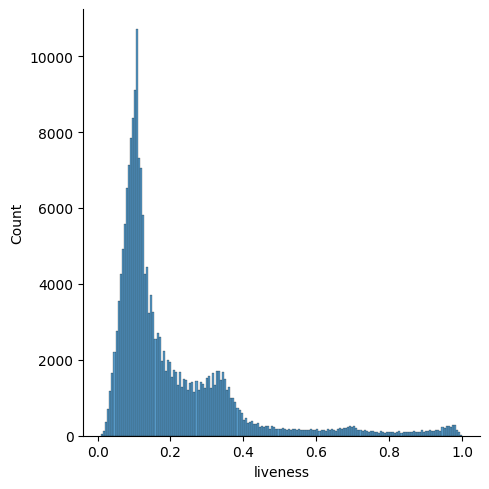

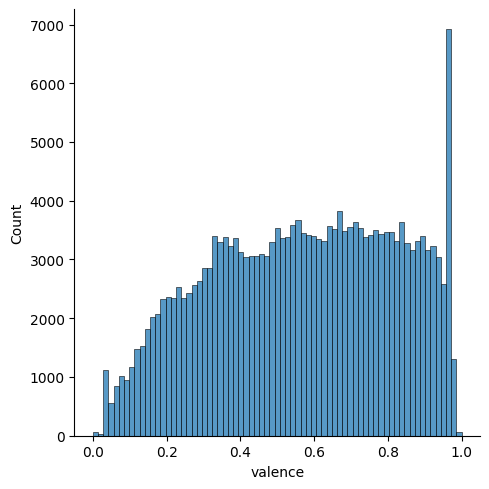

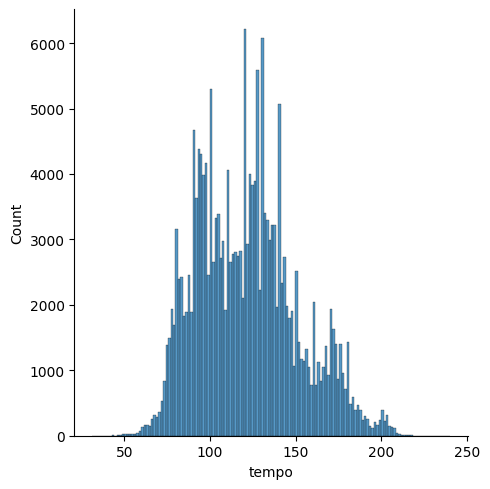

In [60]:
listy = ["speechiness",'acousticness','instrumentalness','liveness','valence','tempo']

for item in listy:
    sns.displot(df, x=item)

### Speechines
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

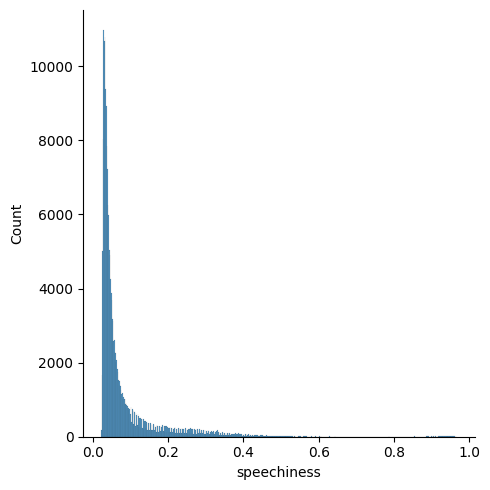

In [61]:
sns.displot(df, x='speechiness')

In [62]:
df[df['speechiness']>0.8]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
72,2SAVRKmLj3WCMNDuINR59y,New Year's With The Wife - Live On The Ed Sull...,['Alan King'],['2ICPGKqTJyyMlcYPriF6Kb'],2020-08-21,256623,0,0.535,0.482,11,-15.272,1,0.843,0.952,0.000002,0.9690,0.450,127.343,4,0
3086,3enjxX3aOAsFyaKeH1O9jO,Sound Bwoy Bureill,['Smif-N-Wessun'],['2p0Hf0MF8Nw8lwAXokczf0'],1995-01-01,259453,1,0.708,0.305,9,-14.003,1,0.817,0.138,0.000003,0.1390,0.691,174.154,4,52
4639,4Vp7PokYymcoThbUoA8sQX,Prayer - Skit,['DMX'],['1HwM5zlC5qNWhJtM00yXzG'],1998-05-01,152133,1,0.717,0.186,0,-20.016,0,0.939,0.469,0.000000,0.4600,0.213,102.082,4,55
5634,2Hn9a8dD2QuPiBHdP46XtZ,Black The 3000 Year Old Dirty Bastard,['The Black Sombrero'],['4xQK2Cd1kpdTYNRIgwhYDZ'],2015-08-10,160619,0,0.459,0.342,7,-22.815,1,0.838,0.275,0.003670,0.0515,0.072,94.965,4,0
6780,4rlyDPumDEOp5c6J8GHgN9,2002 Winter Olympics,['Audio Collaborative'],['3XgTskzo5R9YjZj9UtZISj'],2012-09-20,178390,0,0.629,0.287,1,-17.455,1,0.895,0.447,0.000000,0.2580,0.774,83.068,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197029,0SQ21hh6dRqGQjJvdrqpT6,Skalman glmde ngon,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,265560,0,0.640,0.385,1,-11.481,1,0.946,0.872,0.000000,0.1400,0.571,85.981,3,34
197031,7kneBuGnCYK6woxJnc0RAn,Teddy gr vilse - Del.2,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,258750,0,0.693,0.361,1,-10.874,1,0.940,0.932,0.000000,0.1250,0.495,80.849,3,34
197032,0kA4NEa4kQGDSkKm0eXhmh,Bamse och Sjrvarna - Del.7,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,208006,0,0.717,0.507,9,-11.616,0,0.940,0.926,0.000000,0.6790,0.371,115.369,3,34
197035,4Aiu6JHgtyvN9yab4E4stM,Teddy gr vilse - Del.3,['Bamse'],['1V95p8oWGxXlpcFRYqXV3w'],2009-01-01,254858,0,0.716,0.308,10,-11.326,0,0.897,0.940,0.000007,0.1720,0.605,123.693,3,34


Iffy to cut these bc of rap songs

### Instrumentalness

In [63]:
df[df['instrumentalness']>0.9]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
14,4xgiFXUbqLpjFk9e3dUEMA,"Ecstasy of Gold - From ""The Good, the Bad and ...",['Ennio Morricone'],['1nIUhcKHnK6iyumRyoV68C'],2012-09-05,220653,0,0.172,0.6460,9,-8.897,0,0.1690,0.717,0.933,0.6810,0.12400,99.187,4,14
31,4WybrSagfGRf79Wfn7EW0w,Spring Is Nearly Here,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,183293,0,0.351,0.2910,0,-12.580,1,0.0276,0.959,0.902,0.1360,0.34400,105.337,3,9
74,0LOJBeEWjFY1Uo924xVj7A,"Theme - From ''The Battle of Algiers'', 1966",['Ennio Morricone'],['1nIUhcKHnK6iyumRyoV68C'],2012-09-05,152707,0,0.537,0.7940,9,-10.669,1,0.0662,0.641,0.947,0.0874,0.56000,123.538,4,4
81,68Ty1JVjb8OZepzlREds6b,Genie with the Light Brown Lamp,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,160333,0,0.402,0.7640,0,-10.964,1,0.0305,0.234,0.950,0.0335,0.96200,88.900,4,2
86,1d92AryQ3MLo1HMojGetZM,Nivram,['The Shadows'],['03hfAxVdAWj7kxDnSG0fLD'],1991-01-01,201893,0,0.693,0.1080,2,-20.296,1,0.0493,0.916,0.963,0.0893,0.57400,129.090,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198968,3zLTPuucd3e6TxZnu2dlVS,"Bagatelle No. 25 in A Minor, WoO 59 ""Fr Elise""","['Ludwig van Beethoven', 'Igor Levit']","['2wOqMjp9TyABvtHdOSOTUS', '0japPUWMmW3gxqjSB1...",2015-01-01,212067,0,0.289,0.0306,9,-30.790,0,0.0446,0.987,0.911,0.1020,0.11800,125.610,3,48
198980,2fIVdzd4JW4HnwzqrvCysf,Let Her Go,['David Fischbein'],['4SnnTtHKeeWxZ8FxzMv435'],2016-10-07,192727,0,0.257,0.0317,8,-23.030,1,0.0424,0.989,0.944,0.1600,0.26800,205.506,4,60
198984,3s4zQCLsI9YG2XSw7fmkeO,Brahms' Lullaby,['Eugene Lopin'],['5fnKsV4JHpqMoKyhKjQmj6'],2017-10-25,186217,0,0.540,0.2740,3,-11.902,1,0.0358,0.909,0.959,0.2390,0.35300,79.973,3,44
198990,3LMvyfd6x8OVW6VvYDFlNB,Lush Rain,['Rain Hard'],['5SGuAyOqyIejlY3Lxv7CjX'],2017-05-05,204750,0,0.168,0.9980,3,-21.382,0,0.0566,0.158,0.903,0.9490,0.00001,123.148,4,57


Deal with soundtracks? but also classical music rip, cant delete <3 unless goal changes (or don't include billboard anymore)

In [64]:
# sound track

### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

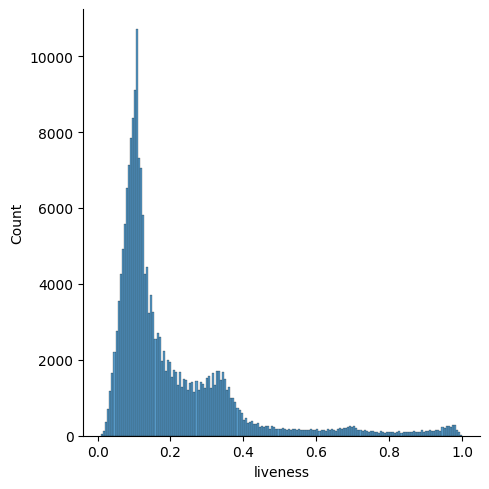

In [65]:
sns.displot(df, x='liveness')

In [66]:
df[df['liveness']>0.9]

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
2,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.201,7,-17.796,1,0.0623,0.88700,0.000000,0.904,0.23900,117.153,3,26
6,67BBzbF6t4ejG7HwVjQ4Tm,"Love For Sale - Live At Chez Club, Hollywood/1...",['Buddy Rich Big Band'],['5cyeaYQ80Wkqvxx4HcY0jo'],1997-01-01,291573,0,0.409,0.839,5,-7.695,0,0.2000,0.44500,0.235000,0.958,0.55700,112.624,4,18
41,4tAY3clWeIHaGWcKwl860R,Olen hautausmaa - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,153733,0,0.441,0.682,2,-12.390,1,0.0336,0.33000,0.000000,0.930,0.86400,141.795,4,5
43,1bQHK0D7WjvDIaGyFZyokA,Lumi teki enkelin eteiseen - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,234200,0,0.311,0.340,7,-15.079,1,0.0416,0.53000,0.000000,0.988,0.31000,134.892,4,7
44,1kdRZuRMnqlePLONWkMNkW,Juodaan viinaa - Live,['Hector'],['5UaXeIdkgIbWPwnClfQIU5'],1992-01-01,219240,0,0.513,0.920,7,-10.882,1,0.0719,0.26700,0.000000,0.970,0.62900,120.052,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197681,18lJtRd5zSqezlKjD5treG,Nu kan du f mig s ltt (Live),['Håkan Hellström'],['3H7Ez7cwaYw4L3ELy4v3Lc'],2014-12-12,296587,0,0.166,0.369,7,-16.221,1,0.0516,0.90300,0.000000,0.972,0.34800,69.835,4,37
198199,1VBUOK5nkeNgKVDpfd0PPW,Hng med p party,['Titanix'],['6qbReoCHJ3BPXU47VxeajP'],2018-07-13,247693,0,0.621,0.940,6,-5.816,0,0.0585,0.00464,0.000002,0.936,0.78500,141.990,4,45
198841,7Dyk3PpDhJPkxpTGGxiu6X,Lord Reign in Me,"['Vineyard Worship', 'Brenton Brown']","['7cvnCTBvMm6OvTutfCpxjL', '3oZR0tAkfIn1YmLe1f...",1998-07-11,237321,0,0.420,0.884,0,-5.014,1,0.0381,0.24600,0.002690,0.966,0.50000,91.124,4,33
198904,2H3KAEoeYJnngTHY6PGK8i,Be My Lover,['La Bouche'],['488v7rQzthLNK22r0UvMie'],2007-01-01,240867,0,0.658,0.963,1,-3.283,0,0.0326,0.00283,0.000002,0.951,0.79300,134.798,4,23


"\n# actually remove stuff (?) (might not even need this tbh)\ndef det(x):\n    try:\n        lang = detect(x)\n    except:\n        lang = 'Other'\n\n    return lang\n\ndf['name'] = df['name'].apply(lambda x: '' if det(x)!='en' else x)\nprint(test.shape)\n"

In [75]:
corr = df.corr()

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

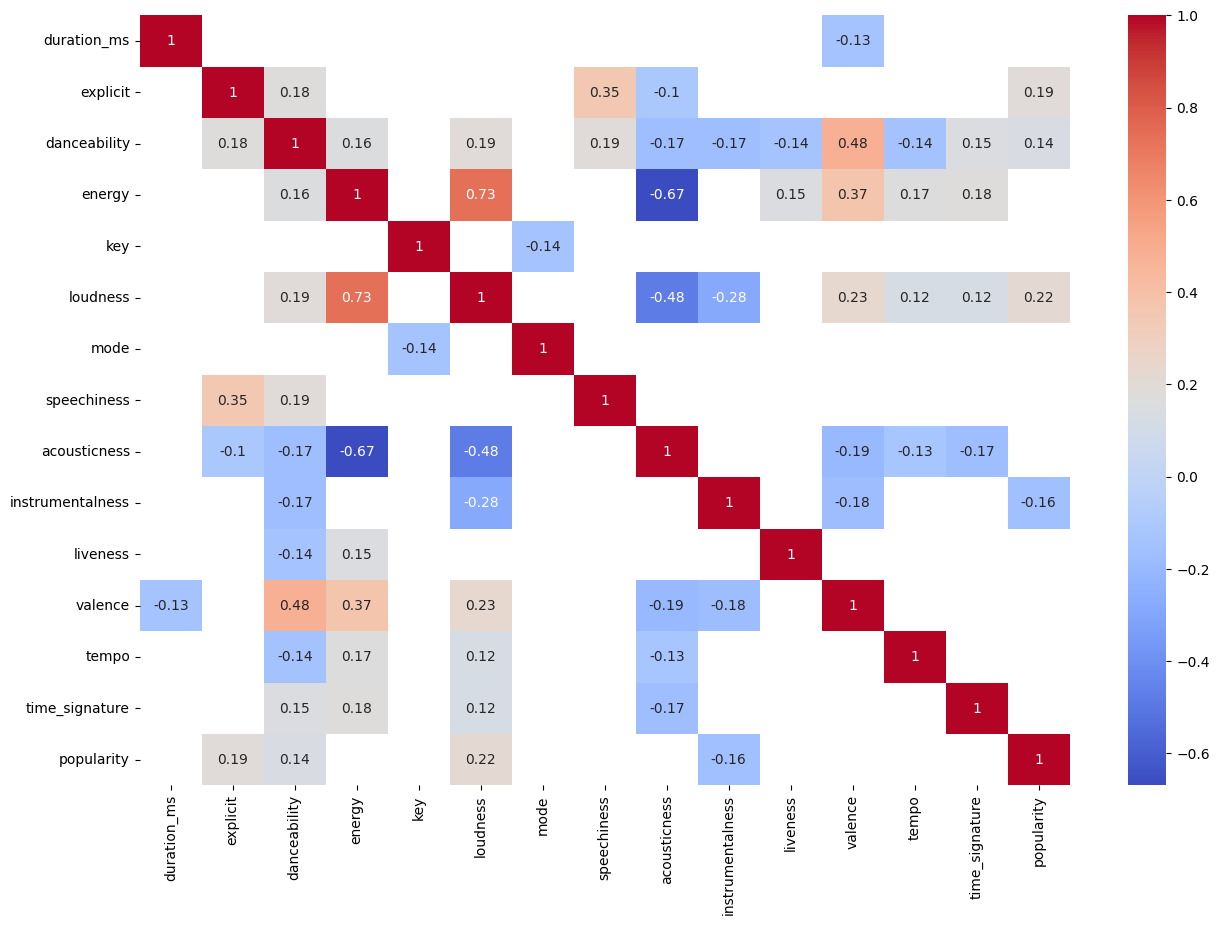

In [76]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')

In [77]:
df

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.2650,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.8670,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
2,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.2010,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
3,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.1290,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
4,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,158800,0,0.459,0.3440,1,-12.205,1,0.0301,0.764,0.000594,0.1110,0.4870,106.479,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199014,1Kzjk1EyngBcP4T8x3fyqv,(...),['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,205238,0,0.743,0.6790,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.3950,126.070,4,43
199015,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,66
199016,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,72
199017,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,70


In [78]:
# https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1
# dummify categ data
df = pd.get_dummies(df, columns=['time_signature', 'key', 'mode'], drop_first=True)

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_21856/2954895827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

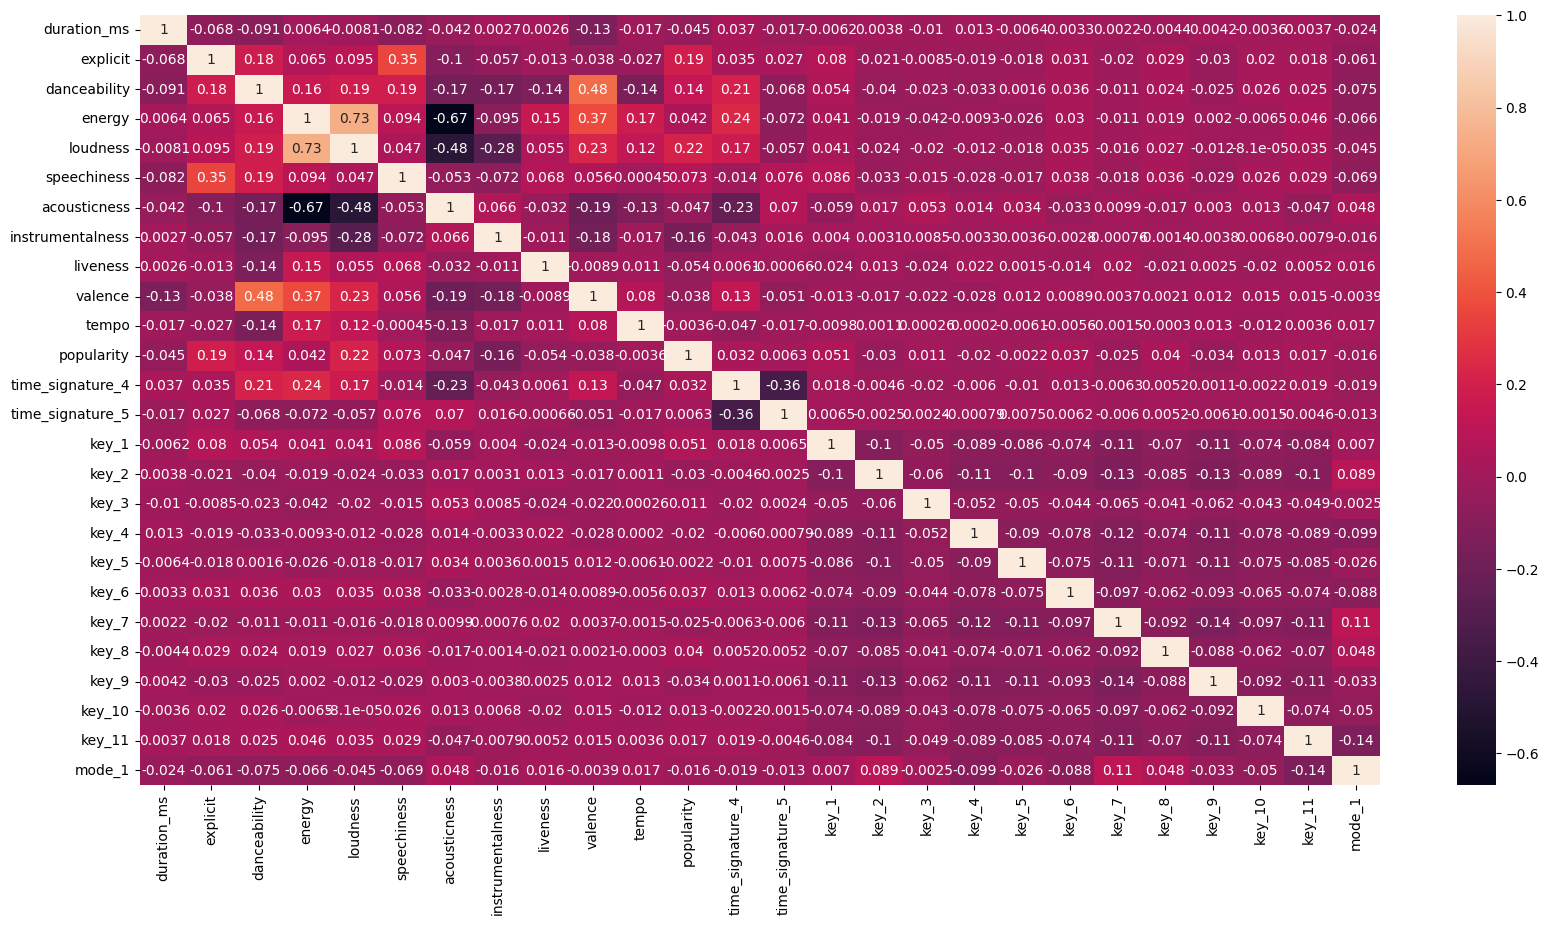

In [79]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [84]:
df

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,loudness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,00:02:40,0,0.484,0.2650,-11.101,...,0,0,0,0,0,0,0,0,0,1
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,00:02:39,0,0.671,0.8670,-2.706,...,0,0,0,0,0,0,0,0,0,1
2,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,00:03:07,0,0.319,0.2010,-17.796,...,0,0,0,0,1,0,0,0,0,1
3,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,00:03:56,0,0.269,0.1290,-18.168,...,0,0,0,0,1,0,0,0,0,0
4,4LDaBsMVANIqGcD4rOjaUT,Don't Let the Sun Catch You Crying - 2008 Rema...,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,00:02:38,0,0.459,0.3440,-12.205,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199014,1Kzjk1EyngBcP4T8x3fyqv,(...),['Boon Hui Lu'],['6PWJWwEm8BSBFAIAUWlwe4'],2020-03-03,00:03:25,0,0.743,0.6790,-3.952,...,0,0,0,0,0,1,0,0,0,1
199015,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,00:03:05,0,0.562,0.0331,-25.551,...,0,0,0,0,0,0,0,0,0,1
199016,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,00:02:33,0,0.765,0.6630,-5.223,...,0,0,0,0,0,0,0,0,0,1
199017,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,00:03:07,0,0.535,0.3140,-12.823,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# actually remove stuff (?) (might not even need this tbh)
print(test.shape)
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'

    return lang

test['name'] = test['name'].apply(lambda x: '' if det(x)!='en' else x)
print(test.shape)

(265936, 20)
(265936, 20)


In [12]:
test = test[test["name"] != " "]
test = test[test["name"] != ""]
test = test[test['name'].notna()]

print(test.shape)

(70378, 20)


In [13]:
test

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.2650,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.8670,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.3650,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4,40
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.2010,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
4,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.1290,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265924,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,['Laureen Conrad'],['7vgGpuiXdNlCmc994PlMlz'],2020-10-30,82500,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.8900,68.619,4,67
265926,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,['Clinton Kane'],['7okSU80WTrn4LXlyXYbX3P'],2020-11-27,202355,0,0.590,0.4430,0,-5.662,1,0.0722,0.618,0.000000,0.1100,0.3420,149.447,4,67
265930,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,66
265931,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,106002,0,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,4


In [94]:
df.shape

(199019, 31)

In [96]:
# actually remove stuff (?) (might not even need this tbh)
import langid
count = 0
def det(x):
    print(x)
    try:
        lang = langid.classify(x)[0]
    except:
        lang = 'Other'

        count = count +1

    return lang

df['name'] = df['name'].apply(lambda x: x if det(x)=='en' else '')


(200040, 20)


In [14]:
test

,id,name,artists,id_artists,release_date,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,160187,0,0.484,0.2650,0,-11.101,1,0.0322,0.394,0.000000,0.1490,0.2850,113.564,3,56
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,159560,0,0.671,0.8670,2,-2.706,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,41
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,141987,0,0.405,0.3650,6,-10.226,0,0.0289,0.255,0.000005,0.1630,0.5880,104.536,4,40
3,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,187333,0,0.319,0.2010,7,-17.796,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,26
4,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,236800,0,0.269,0.1290,7,-18.168,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265924,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,['Laureen Conrad'],['7vgGpuiXdNlCmc994PlMlz'],2020-10-30,82500,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.8900,68.619,4,67
265926,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,['Clinton Kane'],['7okSU80WTrn4LXlyXYbX3P'],2020-11-27,202355,0,0.590,0.4430,0,-5.662,1,0.0722,0.618,0.000000,0.1100,0.3420,149.447,4,67
265930,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,66
265931,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,106002,0,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,4


In [16]:
test.to_csv(index=False)